In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from path import Path
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
from lib.autoencoder import AutoEncoder
import lib.noisy as noisy
import tensorflow as tf
#from skimage.util import random_noise

In [2]:
#!pip install skimage

In [3]:
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
df = pd.read_csv(DATA_DIR / 'lorenz_system_std.csv' )
df_T = df.T

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.937633,1.381270,1.988279,0.835715,0.968418,-1.645801,-1.646132,-2.515123,2.460708,-2.075157,...,-2.627587,2.432361,-1.042502,-1.050354,1.542291,-0.422958,0.926161,1.937106,-1.822016,0.686985
1,-0.394863,0.774092,0.512229,-1.074370,-0.858107,-0.682986,0.960218,0.383680,-0.671683,-0.487563,...,0.268854,-0.690516,1.043099,1.057451,-1.004499,-0.960833,0.886788,-0.839151,0.945009,0.952096
2,-0.366827,0.554506,0.330681,-0.980174,-0.522248,-0.404951,1.027484,0.367840,-0.747522,-0.221396,...,0.566595,-0.755526,0.860717,1.016159,-0.938755,-0.880364,0.579221,-0.715003,0.959796,0.725132
3,-0.379129,0.753575,0.431119,-1.286658,-0.890797,-0.597829,1.276160,0.566055,-0.966139,-0.348711,...,0.611927,-0.981545,1.206939,1.305879,-1.248891,-1.102002,0.859573,-1.031675,1.235143,0.995638
4,-0.446492,0.708364,0.510405,-0.911352,-0.635741,-0.620787,0.815644,0.222540,-0.515195,-0.466990,...,0.205508,-0.530541,0.846515,0.901165,-0.821573,-0.873299,0.762806,-0.634090,0.777582,0.834671


In [5]:
X_train = df[:int(df.shape[0]*0.7)].values
X_test = df[int(df.shape[0]*0.7):].values

In [6]:
#AE = AutoencoderReduction(n_inputs=X_train.shape[1], n_hidden=10,n_outputs=X_train.shape[1], learning_rate=0.01)
AE = AutoEncoder(num_features=X_train.shape[1], num_latent_node = 10,activation_fun='relu',  lamda = 0.00001)
AE.model_settings()
AE.setting_train_test_DS(X_train, X_test)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
#latent_rep, rec_rep =AE.fit_predict(epochs=10000, training_set=X_train, test_set=X_test)
AE.fit(epochs=50)

Epoch 1/50
700/700 [==============================] - 0s 390us/sample - loss: 1.0945 - mean_squared_error: 1.0943
Epoch 2/50
700/700 [==============================] - 0s 72us/sample - loss: 0.8861 - mean_squared_error: 0.8860
Epoch 3/50
700/700 [==============================] - 0s 75us/sample - loss: 0.7570 - mean_squared_error: 0.7568
Epoch 4/50
700/700 [==============================] - 0s 72us/sample - loss: 0.6412 - mean_squared_error: 0.6411
Epoch 5/50
700/700 [==============================] - 0s 74us/sample - loss: 0.5198 - mean_squared_error: 0.5197
Epoch 6/50
700/700 [==============================] - 0s 71us/sample - loss: 0.4040 - mean_squared_error: 0.4039
Epoch 7/50
700/700 [==============================] - 0s 64us/sample - loss: 0.3045 - mean_squared_error: 0.3044
Epoch 8/50
700/700 [==============================] - 0s 74us/sample - loss: 0.2264 - mean_squared_error: 0.2263
Epoch 9/50
700/700 [==============================] - 0s 71us/sample - loss: 0.1704 - mean_squa

In [8]:
rec_rep = AE.predict_test()

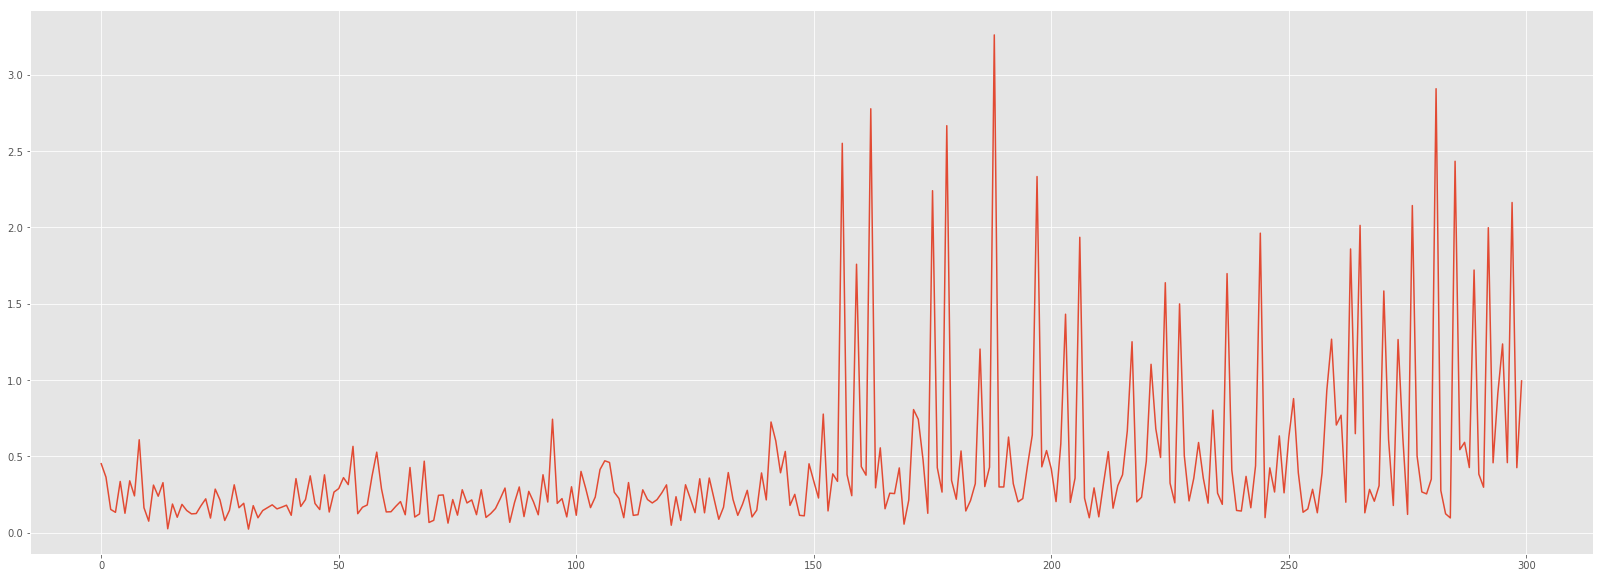

In [9]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(AE.get_error_recustruction_test())

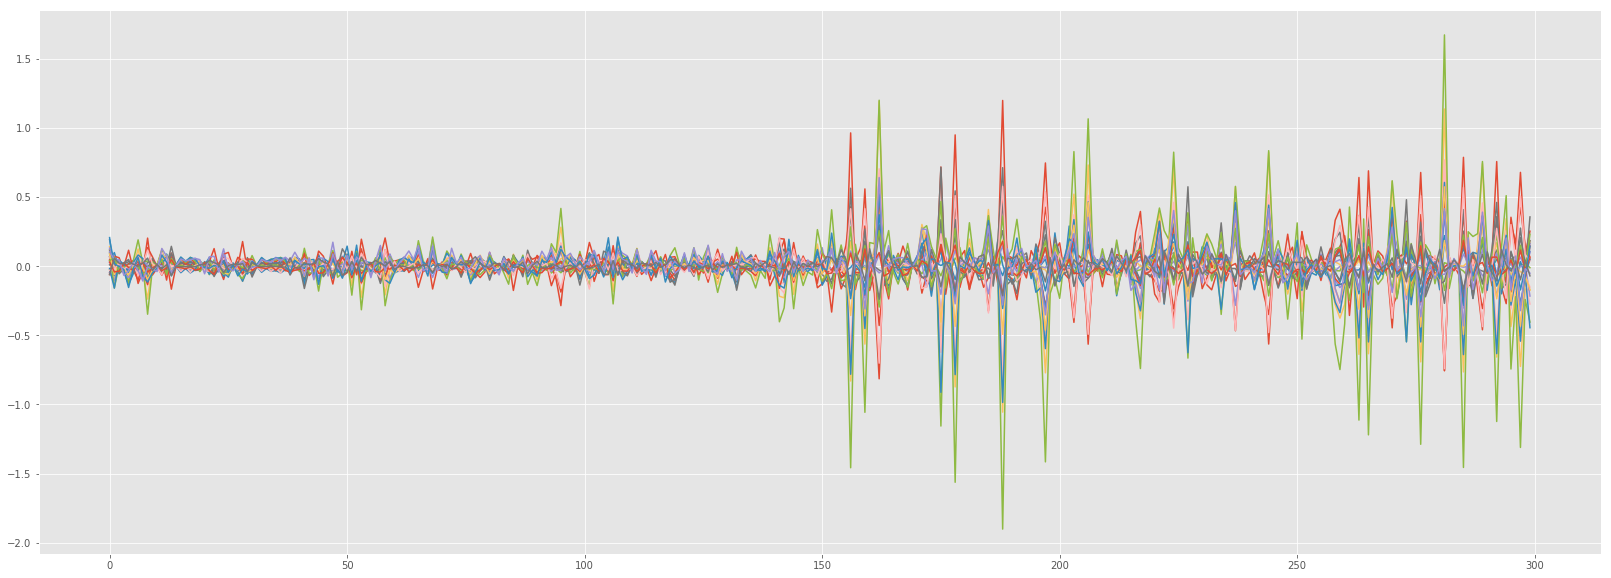

In [10]:
X=rec_rep.T
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    for i in np.arange(0,25):
        plt.plot(np.arange(300), X_test.T[i,:]-X[i,:])

# Denosing Autoencoder

In [11]:
AE_denoising = AutoEncoder(num_features=25,num_latent_node=50, lamda = 0.00001)
AE_denoising.model_settings()
#X_train_noise = random_noise(X_train, mode='pepper')
X_train_noise = noisy.noisy("s&p" ,X_train)
AE_denoising.setting_train_test_DS(X_train_noise, X_test)

/home/ec2-user/SageMaker/MASL_project_2019/progetto/lib/noisy.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
/home/ec2-user/SageMaker/MASL_project_2019/progetto/lib/noisy.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


In [12]:
type(X_train)

numpy.ndarray

In [13]:
AE_denoising.fit(epochs=100)

Epoch 1/100
700/700 [==============================] - 0s 382us/sample - loss: 1.2618 - mean_squared_error: 1.2614
Epoch 2/100
700/700 [==============================] - 0s 72us/sample - loss: 0.8076 - mean_squared_error: 0.8073
Epoch 3/100
700/700 [==============================] - 0s 72us/sample - loss: 0.5621 - mean_squared_error: 0.5618
Epoch 4/100
700/700 [==============================] - 0s 73us/sample - loss: 0.3984 - mean_squared_error: 0.3980
Epoch 5/100
700/700 [==============================] - 0s 70us/sample - loss: 0.2849 - mean_squared_error: 0.2845
Epoch 6/100
700/700 [==============================] - 0s 74us/sample - loss: 0.2058 - mean_squared_error: 0.2054
Epoch 7/100
700/700 [==============================] - 0s 70us/sample - loss: 0.1515 - mean_squared_error: 0.1511
Epoch 8/100
700/700 [==============================] - 0s 71us/sample - loss: 0.1158 - mean_squared_error: 0.1153
Epoch 9/100
700/700 [==============================] - 0s 70us/sample - loss: 0.0928 - 

In [14]:
rec_rep = AE_denoising.predict_test()

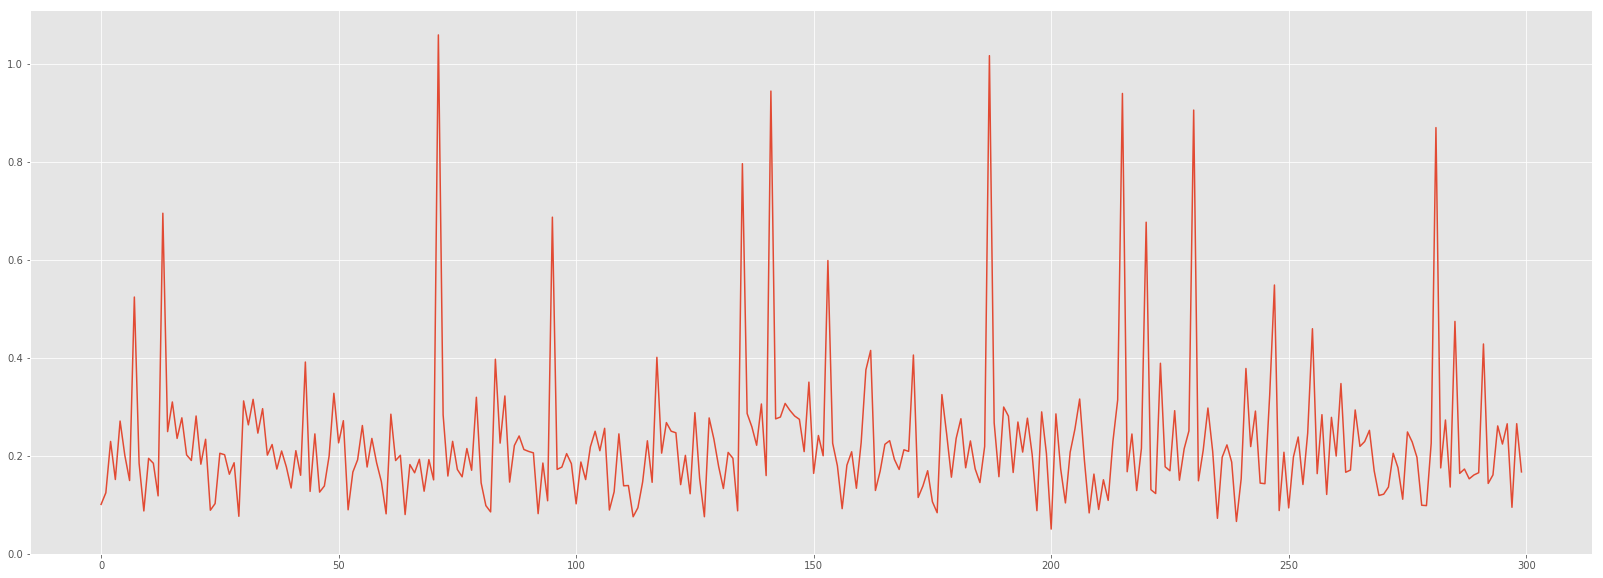

In [15]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(AE_denoising.get_error_recustruction_test())

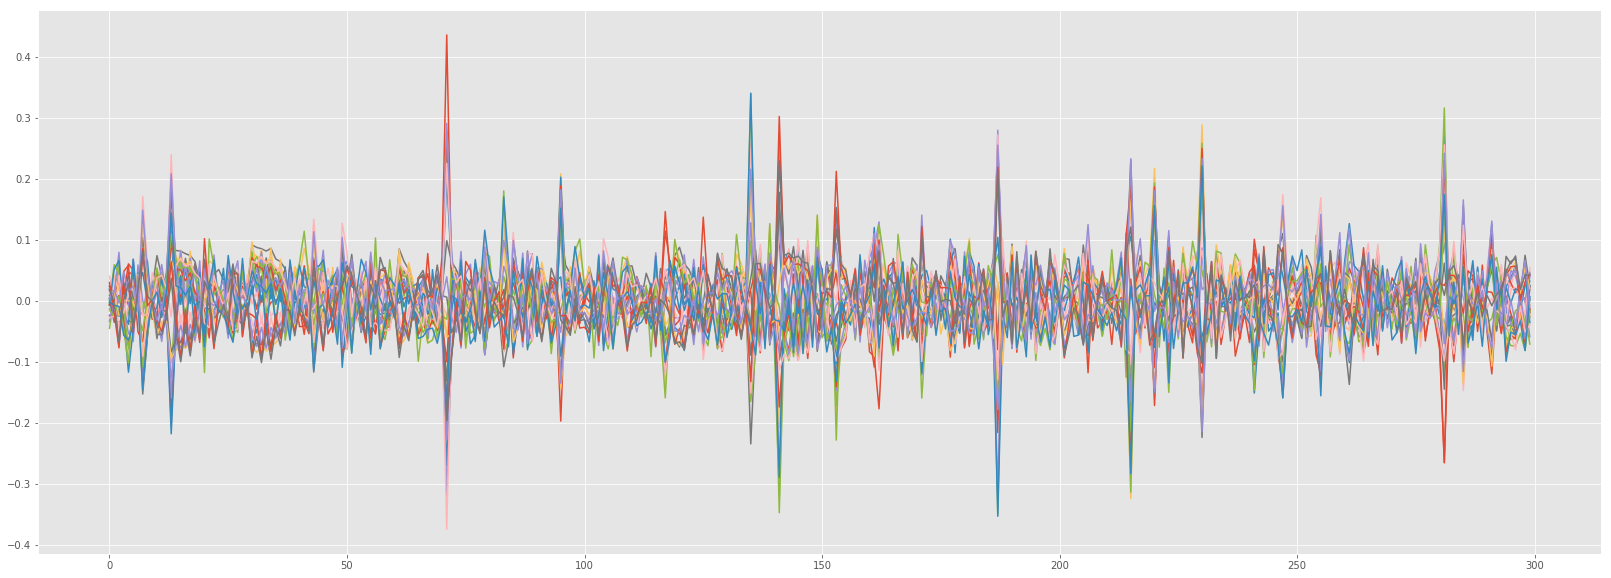

In [16]:
X=rec_rep.T
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    for i in np.arange(0,25):
        plt.plot(np.arange(300), X_test.T[i,:]-X[i,:])

In [17]:
X

array([[ 1.8218935 ,  0.28322276, -0.7359638 , ...,  0.62374437,
        -0.00335047,  1.6308603 ],
       [-2.0757947 , -0.12819469,  0.8934807 , ..., -0.8758602 ,
        -0.333562  , -1.8059881 ],
       [-1.9804364 , -0.1383971 ,  0.9306373 , ..., -0.57489455,
        -0.09368865, -1.6816204 ],
       ...,
       [ 0.3062925 , -0.05376631,  0.11671171, ...,  1.0880102 ,
         0.77435046,  0.4186321 ],
       [-0.6234511 , -0.13949177, -0.1280374 , ..., -1.4864799 ,
        -0.7651362 , -0.83949924],
       [-1.9849266 , -0.10639435,  0.7766269 , ..., -1.1570994 ,
        -0.52526736, -1.7946812 ]], dtype=float32)